tensorflow문법 p26

In [4]:
import tensorflow as tf

node1 = tf.constant(3.0, tf.float32)  # 실수형
node2 = tf.constant(4.0) # data type을 지정하지 않으면 데이터에서 유추
node3 = tf.add(node1, node2)
#tf.constant(value, dtype = None, shape = None, name ='Const')

print(node1)
print(node2)
print(node3)

with tf.Session() as sess:
    print("sess.run(node1,node2): ", sess.run([node1,node2]))
    print("sess.run(node3): ", sess.run(node3))

Tensor("Const_6:0", shape=(), dtype=float32)
Tensor("Const_7:0", shape=(), dtype=float32)
Tensor("Add_3:0", shape=(), dtype=float32)
sess.run(node1,node2):  [3.0, 4.0]
sess.run(node3):  7.0


In [6]:
a = tf.placeholder(tf.float32)  #값의 데이터 타입을 지정
b = tf.placeholder(tf.float32)
adder_node = a+b   # tf.add(a,b)

sess = tf.Session()
print(sess.run(adder_node, feed_dict = {a:3, b:4.5}))   #딕셔너리 형식으로 값을 받음
print(sess.run(adder_node, feed_dict = {a:[1,3], b:[2,4]}))  #리스트 형태로 각 숫자를 더해준다.
# feed_dict -> 값을 입력받는다.
sess.close()

7.5
[3. 7.]


In [7]:
hello = tf.constant("Hello, Tensorflow!")

with tf.Session() as sess:
    print(sess.run(hello))

b'Hello, Tensorflow!'


신경망 구현

In [15]:
## 1. Build graph using TF operations
# H(x) = Wx + b

X = [1,2,3]
Y = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# Our hypothesis Wx+b
hypothesis = X*W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-Y))

# GredientDescent(경사하강법)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)  # cost값을 최소화


## 2/3. Run/Update graph and get results

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph
    sess.run(tf.global_variables_initializer())  # 변수 초기화
    
    # fit the line
    for step in range(2001):  #0~2000
        sess.run(train)  #출력X
        if step % 20 == 0:
            print(step, sess.run(cost), sess.run(W), sess.run(b))
            # step(학습 횟수)이 늘어날수록 cost값이 최소가 되는 W,b값을 출력


0 0.37882397 [0.7351489] [1.1059486]
20 0.056862358 [0.7230455] [0.6295826]
40 0.021484137 [0.82976264] [0.38698953]
60 0.008117273 [0.89535916] [0.23787327]
80 0.0030669235 [0.93567973] [0.1462151]
100 0.0011587694 [0.9604639] [0.08987494]
120 0.00043781195 [0.9756981] [0.05524397]
140 0.00016541618 [0.9850622] [0.03395713]
160 6.249933e-05 [0.9908181] [0.02087266]
180 2.3613937e-05 [0.9943561] [0.01282994]
200 8.922137e-06 [0.99653083] [0.00788628]
220 3.3709982e-06 [0.9978676] [0.00484752]
240 1.2734735e-06 [0.9986893] [0.00297965]
260 4.8124485e-07 [0.9991943] [0.00183153]
280 1.8181804e-07 [0.9995048] [0.00112581]
300 6.868365e-08 [0.9996956] [0.00069195]
320 2.594733e-08 [0.9998129] [0.00042533]
340 9.811104e-09 [0.99988496] [0.00026146]
360 3.7085262e-09 [0.9999293] [0.00016069]
380 1.4065004e-09 [0.9999565] [9.880333e-05]
400 5.299891e-10 [0.9999733] [6.0783503e-05]
420 1.9906565e-10 [0.9999836] [3.736285e-05]
440 7.596649e-11 [0.9999899] [2.2934551e-05]
460 2.8152888e-11 [0.99

In [1]:
import tensorflow as tf

# X and Y data
X = [1,2,3]
Y = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# Our hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01) # 학습률 0.01로 경사 하강 train
train = optimizer.minimize(cost) #train 한 값에서 최소값

# Launch the graph in a session
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())
    
    # Fit the line
    for step in range(2001):
        sess.run(train)
        if step % 20 == 0:
            print(step, sess.run(cost), sess.run(W), sess.run(b))
    

0 9.596808 [0.2168622] [-1.4648855]
20 0.20067693 [1.2796499] [-0.9447097]
40 0.10505239 [1.3642007] [-0.85733646]
60 0.0947102 [1.3563869] [-0.81295276]
80 0.08601103 [1.3405238] [-0.7743573]
100 0.0781165 [1.3246047] [-0.7379282]
120 0.07094663 [1.3093575] [-0.70324475]
140 0.06443491 [1.2948196] [-0.67019457]
160 0.05852079 [1.2809643] [-0.63869786]
180 0.05314955 [1.2677599] [-0.6086814]
200 0.048271254 [1.2551762] [-0.58007544]
220 0.043840725 [1.2431839] [-0.5528141]
240 0.039816845 [1.2317551] [-0.52683395]
260 0.036162313 [1.2208635] [-0.5020748]
280 0.0328432 [1.2104838] [-0.47847912]
300 0.029828705 [1.2005917] [-0.45599225]
320 0.027090916 [1.1911647] [-0.43456233]
340 0.02460439 [1.1821808] [-0.41413957]
360 0.022346122 [1.1736189] [-0.3946766]
380 0.020295098 [1.1654594] [-0.37612817]
400 0.018432315 [1.1576834] [-0.35845143]
420 0.016740507 [1.1502727] [-0.34160545]
440 0.015204019 [1.1432105] [-0.3255512]
460 0.013808512 [1.1364802] [-0.31025147]
480 0.01254112 [1.130066

weights값이 1로 수렴할수록 cost값이 최소가되는 것을 볼 수 있다.

cost를 최소화 시키는 weight값은 1으로 최상의 weight값은 1이다.

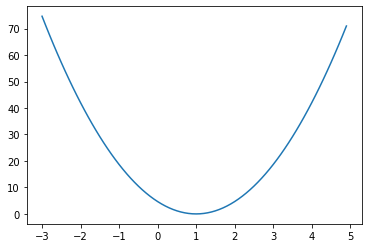

In [2]:
#그래프 시각화

import tensorflow as tf
import matplotlib.pyplot as plt

X = [1,2,3]
Y = [1,2,3]

W = tf.placeholder(tf.float32)
# Our hypothesis for linear model X * W
hypothesis = X*W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-Y))

# Launch the graph in a session.
with tf.Session() as sess:
    # Variables for plotting cost function
    W_val=[]
    cost_val=[]
    for i in range(-30, 50):
        feed_W = i*0.1
        curr_cost, curr_W = sess.run([cost,W], feed_dict= {W:feed_W})
        W_val.append(curr_W)
        cost_val.append(curr_cost)
    
    # Show the cost function
    plt.plot(W_val,cost_val)
    plt.show()


그래프의 x축은 weights값을 y축은 cost값을 나타낸다.

그래프를 살펴보아도 W = 1일때 최소값을 갖는 형태를 보인다.

In [9]:
import tensorflow as tf

# tf Graph input
X = [1,2,3]
Y = [1,2,3]

# Set wrong model weights
W = tf.Variable(5.0) # 처음 weights값을 5.0으로 설정

# Linear model 
hypothesis = X*W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-Y))

# minimizer : Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(11):
        print(step, sess.run(W))
        sess.run(train)


0 5.0
1 1.2666664
2 1.0177778
3 1.0011852
4 1.000079
5 1.0000052
6 1.0000004
7 1.0
8 1.0
9 1.0
10 1.0


In [14]:
import tensorflow as tf

# tf Graph Input
X = [1,2,3]
Y = [1,2,3]

# Set wrong model weights
W = tf.Variable(-3.0)

# Linear model
hypothesis = X*W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-Y))

# Minimize: Granient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())
    
    for step in range(11):
        print(step, sess.run(W))
        sess.run(train)


0 -3.0
1 0.7333336
2 0.98222226
3 0.9988148
4 0.99992096
5 0.9999947
6 0.99999964
7 0.99999994
8 1.0
9 1.0
10 1.0


위의 2 실습을 살펴보면

초기에 잘못된 weight값을 임의로 설정해두고 훈련시킨 모델에 적용하니 기존에 설정했던 weight값이 cost값을 최소로 하는 1에 가깝게 수렴하는 것을 볼 수 있다.

In [17]:
import tensorflow as tf

x_data = [1,2,3]
y_data = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name = 'weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-Y))

# Minimize : Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W*X-Y)*X)
descent = W - learning_rate * gradient  # 업데이트한 weight
update = W.assign(descent)  # W값을 descent값으로 업데이트
# optimizer = GradientDescentOptimizer(learning_rate = 0.1)
# train = optimizer.minimize(cost)

# Launch the graph in a session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(21):
        sess.run(update, feed_dict={X:x_data, Y:y_data})
        print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))

0 4.463865 [0.02197009]
1 1.2697214 [0.47838408]
2 0.3611652 [0.72180486]
3 0.10273143 [0.85162926]
4 0.029221376 [0.92086893]
5 0.0083118705 [0.95779675]
6 0.0023642608 [0.9774916]
7 0.00067250634 [0.9879955]
8 0.00019128692 [0.9935976]
9 5.4411954e-05 [0.99658537]
10 1.5478015e-05 [0.99817884]
11 4.402145e-06 [0.99902874]
12 1.2522328e-06 [0.999482]
13 3.5614457e-07 [0.99972373]
14 1.0131271e-07 [0.99985266]
15 2.8781628e-08 [0.99992144]
16 8.18866e-09 [0.9999581]
17 2.328805e-09 [0.99997765]
18 6.6317324e-10 [0.9999881]
19 1.8905766e-10 [0.9999936]
20 5.4272437e-11 [0.9999966]


p40

In [22]:
import tensorflow as tf

x_data = [[73.,80.,75.],[93.,88.,93.],
         [89.,91.,90.],[96.,98.,100.],[73.,66.,70.]]
y_data = [[152.],[185.],[180.],[196.],[142.]]
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape = [None,3])
Y = tf.placeholder(tf.float32, shape = [None,1])

W = tf.Variable(tf.random_normal([3,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# Hypothesis
hypothesis = tf.matmul(X,W) + b
# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis-Y))
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        cost_val, hy_val, _ = sess.run(
            [cost, hypothesis, train], feed_dict={X:x_data, Y:y_data})
        if step % 10 == 0:
            print(step, "Cost:", cost_val, "\nPrediction:\n",hy_val)
            


0 Cost: 40464.67 
Prediction:
 [[-27.901814]
 [-28.779766]
 [-30.288525]
 [-38.27154 ]
 [-16.595356]]
10 Cost: 9.505722 
Prediction:
 [[150.03337]
 [185.07103]
 [180.42955]
 [191.19542]
 [146.51524]]
20 Cost: 9.111055 
Prediction:
 [[150.57909]
 [185.71297]
 [181.06921]
 [191.89229]
 [147.00114]]
30 Cost: 9.086856 
Prediction:
 [[150.58804]
 [185.70978]
 [181.07327]
 [191.89697]
 [146.99501]]
40 Cost: 9.062825 
Prediction:
 [[150.59535]
 [185.70468]
 [181.07538]
 [191.89954]
 [146.98741]]
50 Cost: 9.038893 
Prediction:
 [[150.60265]
 [185.69957]
 [181.07748]
 [191.90211]
 [146.97984]]
60 Cost: 9.014977 
Prediction:
 [[150.60992]
 [185.69447]
 [181.07957]
 [191.90472]
 [146.97227]]
70 Cost: 8.991321 
Prediction:
 [[150.61716]
 [185.6894 ]
 [181.08163]
 [191.90724]
 [146.96472]]
80 Cost: 8.967685 
Prediction:
 [[150.62437]
 [185.68434]
 [181.0837 ]
 [191.9098 ]
 [146.95718]]
90 Cost: 8.944195 
Prediction:
 [[150.63158]
 [185.67929]
 [181.08578]
 [191.91237]
 [146.94968]]
100 Cost: 8.9208

x가 3개로 늘어났으니까 W도 3개